In [1]:
import os
import pandas as pd
from ema_workbench.analysis import Prim, cart
from ema_workbench.em_framework.outcomes import ScalarOutcome
import matplotlib.pyplot as plt

In [2]:
print("Starting CSV file loading process from 'data/shapes'...")

# Define the path to the "data/shapes" folder (one directory up from the current folder)
data_dir = os.path.join("..", "data", "shapes")
print(f"Data directory set to: {data_dir}\n")

# Initialize a dictionary to store the DataFrames
dataframes = {}

# Verify that the data directory exists
if os.path.exists(data_dir):
    # Loop over each subfolder within the data directory
    for subfolder in os.listdir(data_dir):
        subfolder_path = os.path.join(data_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Loop over each CSV file in the subfolder
            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(subfolder_path, file)
                    try:
                        # Load the CSV file into a DataFrame
                        df = pd.read_csv(file_path)
                        # Create a key by removing the file extension and replacing spaces with underscores
                        key = os.path.splitext(file)[0].replace(" ", "_")
                        dataframes[key] = df
                        print(f"Loaded '{file}' as '{key}' with shape {df.shape}")
                    except Exception as e:
                        print(f"Error loading '{file}' from '{subfolder_path}': {e}")
else:
    print("ERROR: Data directory not found.")

print("\nCSV file loading complete.")
print(f"DataFrames loaded: {list(dataframes.keys())}")

Starting CSV file loading process from 'data/shapes'...
Data directory set to: ..\data\shapes

Loaded 'barbell_2d_x.csv' as 'barbell_2d_x' with shape (5000, 2)
Loaded 'barbell_2d_y.csv' as 'barbell_2d_y' with shape (5000, 1)
Loaded 'barbell_3d_x.csv' as 'barbell_3d_x' with shape (10000, 3)
Loaded 'barbell_3d_y.csv' as 'barbell_3d_y' with shape (10000, 1)
Loaded 'donut_2d_x.csv' as 'donut_2d_x' with shape (5000, 2)
Loaded 'donut_2d_y.csv' as 'donut_2d_y' with shape (5000, 1)
Loaded 'donut_3d_x.csv' as 'donut_3d_x' with shape (10000, 3)
Loaded 'donut_3d_y.csv' as 'donut_3d_y' with shape (10000, 1)
Loaded 'sine_wave_2d_x.csv' as 'sine_wave_2d_x' with shape (5000, 2)
Loaded 'sine_wave_2d_y.csv' as 'sine_wave_2d_y' with shape (5000, 1)

CSV file loading complete.
DataFrames loaded: ['barbell_2d_x', 'barbell_2d_y', 'barbell_3d_x', 'barbell_3d_y', 'donut_2d_x', 'donut_2d_y', 'donut_3d_x', 'donut_3d_y', 'sine_wave_2d_x', 'sine_wave_2d_y']


In [3]:
# Extracting 2D data
x_data = dataframes['barbell_2d_x']  # Features (2D space)
y_data = dataframes['barbell_2d_y']  # Target (binary or continuous)

# If y is continuous, binarize it for PRIM
y_data = (y_data > y_data.median()).astype(int).values.ravel()  # Convert to 1D array

In [4]:
# Initialize PRIM
prim_alg = Prim(x_data, y_data, threshold=0.8, update_function='default')  # Adjust threshold as needed

# Find the first box
box_1 = prim_alg.find_box()

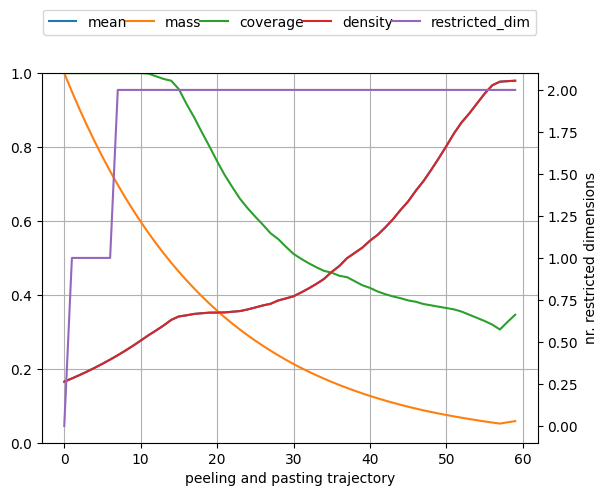

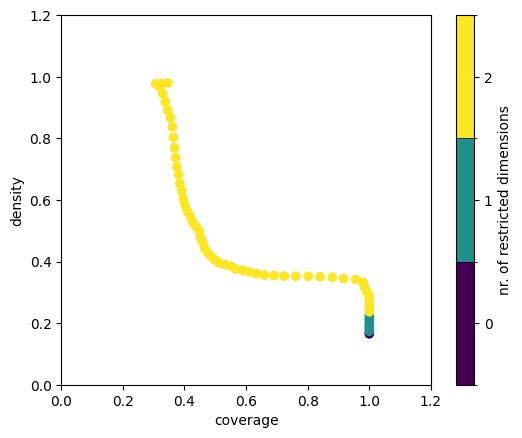

In [5]:
# Show peeling and pasting trajectory
box_1.show_ppt()
plt.show()

# Visualize the trade-off between coverage and density
box_1.show_tradeoff()
plt.show()

In [6]:
# Retrieve the list of boxes from the PRIM peeling trajectory
prim_boxes_df_1 = box_1.peeling_trajectory

# Ensure PRIM analysis has been performed and prim_boxes_df is defined
prim_boxes_df_1['F_metric'] = 2 * (prim_boxes_df_1['density'] * prim_boxes_df_1['coverage']) / (prim_boxes_df_1['density'] + prim_boxes_df_1['coverage'])

# Select the box with the highest F-metric
best_box_index_1 = prim_boxes_df_1['F_metric'].idxmax()
best_box_1 = prim_boxes_df_1.loc[best_box_index_1]
print("Best PRIM Box based on F-metric:\n", best_box_1)

Best PRIM Box based on F-metric:
 coverage      0.346247
density       0.979452
id           59.000000
k           286.000000
mass          0.058400
mean          0.979452
n           292.000000
res_dim       2.000000
F_metric      0.511628
Name: 59, dtype: float64


In [7]:
# Test box significance
box_1.resample(best_box_index_1)

,reproduce coverage,reproduce density
x1,100.0,100.0
x2,100.0,100.0


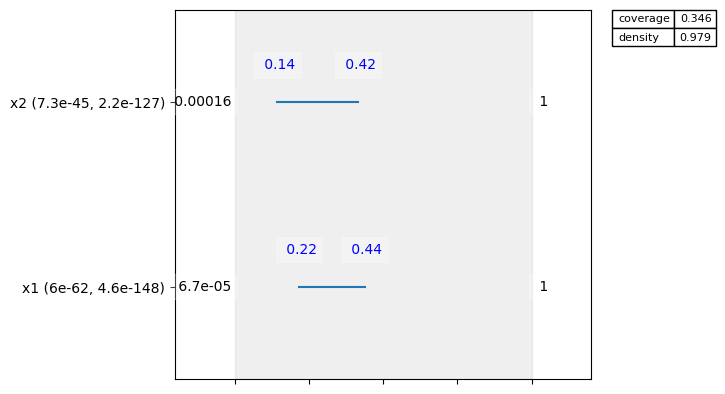

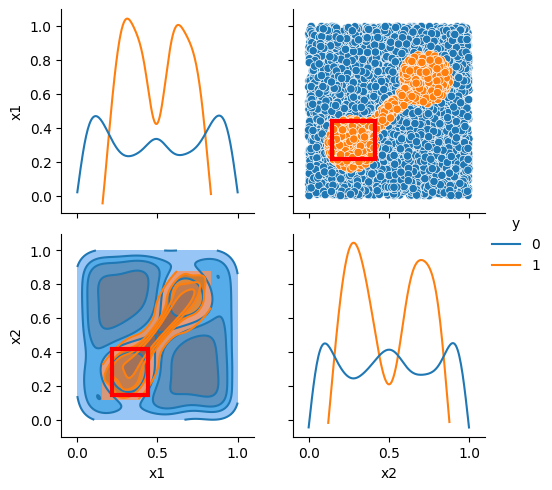

In [8]:
box_1.inspect(best_box_index_1, style="graph")
plt.show()

# Show pairwise scatter plot for the best PRIM box
box_1.show_pairs_scatter(i=best_box_index_1)
plt.show()

## Find A Second Box

In [9]:
# Continue PRIM but ignore points in the first box
box_2 = prim_alg.find_box()

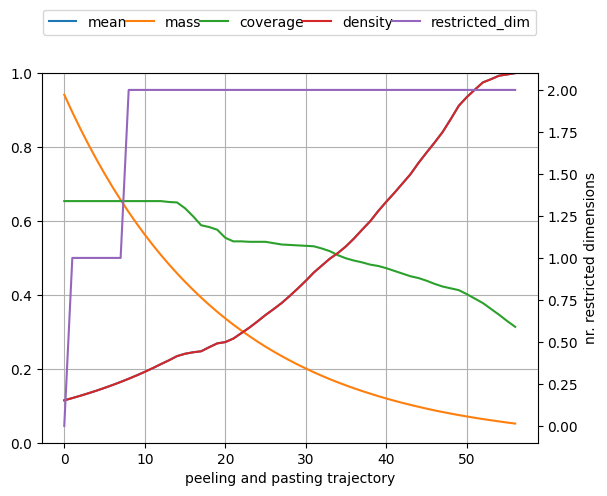

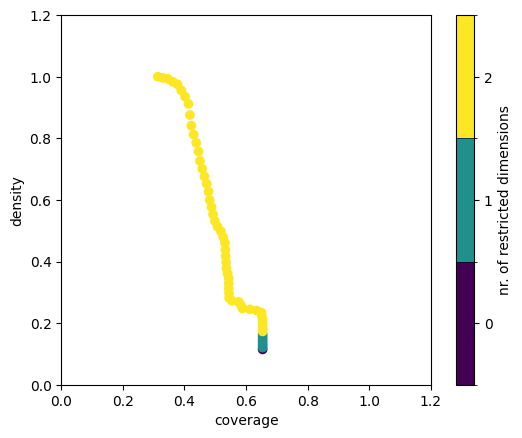

In [10]:
# Get the PRIM peeling trajectory after finding both boxes
prim_boxes_df = box_2.peeling_trajectory

# Show peeling and pasting trajectory
box_2.show_ppt()
plt.show()

# Visualize the trade-off between coverage and density
box_2.show_tradeoff()
plt.show()

In [11]:
# Retrieve the list of boxes from the PRIM peeling trajectory
prim_boxes_df_2 = box_2.peeling_trajectory

# Ensure PRIM analysis has been performed and prim_boxes_df is defined
prim_boxes_df_2['F_metric'] = 2 * (prim_boxes_df_2['density'] * prim_boxes_df_2['coverage']) / (prim_boxes_df_2['density'] + prim_boxes_df_2['coverage'])

# Select the box with the highest F-metric
best_box_index_2 = prim_boxes_df_2['F_metric'].idxmax()
best_box_2 = prim_boxes_df_2.loc[best_box_index_2]
print("Best PRIM Box based on F-metric:\n", best_box_2)

Best PRIM Box based on F-metric:
 coverage      0.412833
density       0.911765
id           49.000000
k           341.000000
mass          0.074800
mean          0.911765
n           374.000000
res_dim       2.000000
F_metric      0.568333
Name: 49, dtype: float64


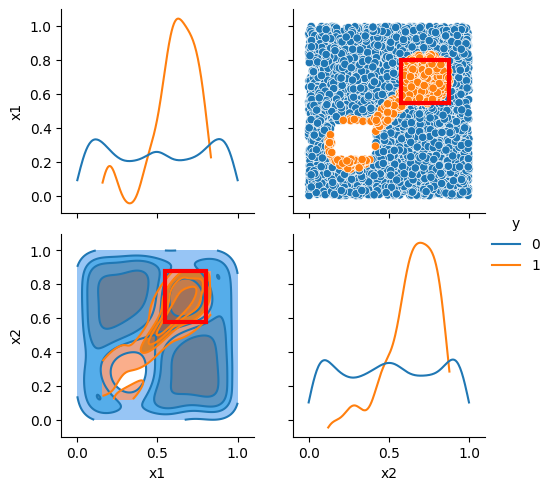

In [18]:
box_2.inspect(best_box_index_2, style="graph")
plt.show()

# Show pairwise scatter plot for the best PRIM box
box_2.show_pairs_scatter(i=best_box_index_2)
plt.show()

## Automated PRIM   

In [14]:
def iterate_prim_boxes(x_data, y_data, num_iterations=3):
    """
    Iteratively run the PRIM algorithm on the provided x_data and y_data.
    
    The function performs the following steps for each iteration:
      1. Finds the first box using PRIM.
      2. Retrieves and prints the entire peeling trajectory.
      3. Computes the F-metric (harmonic mean of density and coverage) for each candidate box.
      4. Identifies and prints the best candidate box based on the highest F-metric.
      5. Resamples the best box and checks its significance.
         - If every value in the resampled DataFrame is > 95, the box is deemed significant.
         - Otherwise, it is considered not significant.
      6. Displays the pairwise scatter plot for the best box.
      
    Parameters:
        x_data (pd.DataFrame): The feature space.
        y_data (array-like): The binary target array.
        num_iterations (int): The number of iterations to run.
    """
    
    # Initialize PRIM outside the loop using the complete dataset.
    prim_alg = Prim(x_data, y_data, threshold=0.8, update_function='default')
    
    for i in range(num_iterations):
        print(f"\n--- Iteration {i+1} ---")
        
        # Find the first box using the current state of prim_alg.
        box = prim_alg.find_box()
        
        # Retrieve and print the peeling trajectory.
        peeling_df = box.peeling_trajectory.copy()
        print("Peeling Trajectory:")
        print(peeling_df.head())
        
        # Calculate the F-metric: harmonic mean of density and coverage.
        peeling_df['F_metric'] = 2 * (peeling_df['density'] * peeling_df['coverage']) / \
                                 (peeling_df['density'] + peeling_df['coverage'])
        
        # Identify the best candidate box based on the highest F-metric.
        best_box_index = peeling_df['F_metric'].idxmax()
        best_box = peeling_df.loc[best_box_index]
        print("\nBest Box based on F_metric:")
        print(best_box)
        
        # Display the pairwise scatter plot for the best box.
        box.show_pairs_scatter(i=best_box_index)
        
        plt.show()

In [16]:
def iterate_prim_boxes(x_data, y_data, num_iterations=3):
    """
    Iteratively run the PRIM algorithm on the provided x_data and y_data.
    
    For each iteration:
      1. Reinitialize PRIM with the full dataset.
      2. Find the first box using PRIM.
      3. Retrieve and print the peeling trajectory.
      4. Compute the F-metric (harmonic mean of density and coverage) for each candidate box.
      5. Identify and print the best candidate box (with the highest F-metric).
      6. Resample the best box and check its significance:
         - If every value in the resampled DataFrame is > 95, the box is deemed SIGNIFICANT.
         - Otherwise, it is deemed not significant.
      7. Display the pairwise scatter plot for the best box.
      
    Parameters:
        x_data (pd.DataFrame): The feature space.
        y_data (array-like): The binary target array.
        num_iterations (int): The number of iterations to run.
    """
    for i in range(num_iterations):
        print(f"\n--- Iteration {i+1} ---")
        
        # Reinitialize PRIM with the complete dataset.
        prim_alg = Prim(x_data, y_data, threshold=0.8, update_function='default')
        box = prim_alg.find_box()
        
        # Retrieve and print the peeling trajectory.
        peeling_df = box.peeling_trajectory.copy()
        print("Peeling Trajectory (first few rows):")
        print(peeling_df.head())
        
        # Calculate the F-metric: harmonic mean of density and coverage.
        peeling_df['F_metric'] = 2 * (peeling_df['density'] * peeling_df['coverage']) / \
                                 (peeling_df['density'] + peeling_df['coverage'])
        
        # Identify the best candidate box based on the highest F-metric.
        best_box_index = peeling_df['F_metric'].idxmax()
        best_box = peeling_df.loc[best_box_index]
        print("\nBest Box based on F_metric:")
        print(best_box)
        
        # Resample the best box and check its significance.
        resample_df = box.resample(best_box_index)
        if (resample_df.values > 95).all():
            print("Box has been resampled and is deemed SIGNIFICANT (all values > 95).")
        else:
            print("Box has been resampled and is NOT significant (some values <= 95).")
        
        # Display the pairwise scatter plot for the best box.
        box.show_pairs_scatter(i=best_box_index)
        plt.show()

In [25]:
import os
import pandas as pd
from ema_workbench.analysis import Prim, cart
from ema_workbench.em_framework.outcomes import ScalarOutcome
import matplotlib.pyplot as plt

def iterate_prim_boxes(x_data, y_data, num_iterations=3):
    """
    Iteratively run the PRIM algorithm on x_data and y_data.
    
    For each iteration:
      1. Reinitialize PRIM on the current (remaining) data.
      2. Find the first box using PRIM.
      3. Retrieve and print the peeling trajectory.
      4. Compute the F-metric (harmonic mean of density and coverage) for each candidate box.
      5. Identify and print the best candidate box based on the highest F-metric.
      6. Resample the best box, print the resampled DataFrame, and check its significance 
         (all values > 95). Then, print whether the box is SIGNIFICANT or NOT.
      7. Display the pairwise scatter plot for the best box.
      8. Remove the points inside the best box from the dataset.
      9. Save the box details (coverage, density, F-metric, etc.) in a list.
      
    Parameters:
        x_data (pd.DataFrame): The full feature space.
        y_data (array-like): The binary target array.
        num_iterations (int): The number of boxes to generate.
        
    Returns:
        list of dict: Each dictionary contains details for one accepted box.
    """
    
    # Create working copies of the data.
    current_x = x_data.copy()
    current_y = y_data.copy()
    
    boxes_output = []  # List to store details for each box.
    
    for i in range(num_iterations):
        print(f"\n--- Iteration {i+1} ---")
        
        # Reinitialize PRIM on the current dataset.
        prim_alg = Prim(current_x, current_y, threshold=0.8, update_function='default')
        box = prim_alg.find_box()  # Find the first box on the current dataset.
        
        # Retrieve and print the peeling trajectory.
        peeling_df = box.peeling_trajectory.copy()
        print("Peeling Trajectory (first few rows):")
        print(peeling_df.head())
        
        # Calculate F-metric: harmonic mean of density and coverage.
        peeling_df['F_metric'] = 2 * (peeling_df['density'] * peeling_df['coverage']) / \
                                 (peeling_df['density'] + peeling_df['coverage'])
        
        # Identify the best candidate box based on the highest F_metric.
        best_box_index = peeling_df['F_metric'].idxmax()
        best_box = peeling_df.loc[best_box_index]
        print("\nBest Box based on F_metric:")
        print(best_box)
        
        # Resample the best box.
        resample_df = box.resample(best_box_index)
        print("\nResampled DataFrame:")
        print(resample_df)
        
        # Check significance: all values in the resample DataFrame must be > 95.
        significance = (resample_df.values > 95).all()
        if significance:
            print("Box has been resampled and is deemed SIGNIFICANT (all values > 95).")
        else:
            print("Box has been resampled and is NOT significant (some values <= 95).")
        
        # Display the pairwise scatter plot for the best box.
        box.show_pairs_scatter(i=best_box_index)
        plt.show()
        
        # -------------------------------
        # For each variable, we check whether the data points are within the limits.
        # -------------------------------
        box_limits = box.box_lims[best_box_index]
        mask = pd.Series(True, index=current_x.index)
        for var, limits in box_limits.items():
            # Skip variables with no limits (if any)
            if limits is None:
                continue
            lower, upper = limits
            mask &= (current_x[var] >= lower) & (current_x[var] <= upper)
        num_in_box = mask.sum()
        print(f"Removing {num_in_box} points captured by this box.")
        
        # Save box details.
        box_details = {
            'iteration': i+1,
            'best_box_index': best_box_index,
            'F_metric': best_box['F_metric'],
            'coverage': best_box['coverage'],
            'density': best_box['density'],
            'n_points': num_in_box,
            'box_details': best_box,
            'significant': significance
        }
        boxes_output.append(box_details)
        
        # Remove the points inside the best box from the dataset.
        current_x = current_x.loc[~mask].reset_index(drop=True)
        current_y = current_y[~mask]
        
        # Check if any data remain.
        if current_x.empty:
            print("No more data remaining. Ending iterations.")
            break
    
    return boxes_output


--- Iteration 1 ---
Peeling Trajectory (first few rows):
   coverage   density  id    k    mass      mean     n  res_dim
0       1.0  0.165200   0  826  1.0000  0.165200  5000        0
1       1.0  0.173895   1  826  0.9500  0.173895  4750        1
2       1.0  0.183067   2  826  0.9024  0.183067  4512        1
3       1.0  0.192720   3  826  0.8572  0.192720  4286        1
4       1.0  0.202899   4  826  0.8142  0.202899  4071        1

Best Box based on F_metric:
coverage      0.346247
density       0.979452
id           59.000000
k           286.000000
mass          0.058400
mean          0.979452
n           292.000000
res_dim       2.000000
F_metric      0.511628
Name: 59, dtype: float64

Resampled DataFrame:
    reproduce coverage  reproduce density
x1               100.0              100.0
x2               100.0              100.0
Box has been resampled and is deemed SIGNIFICANT (all values > 95).


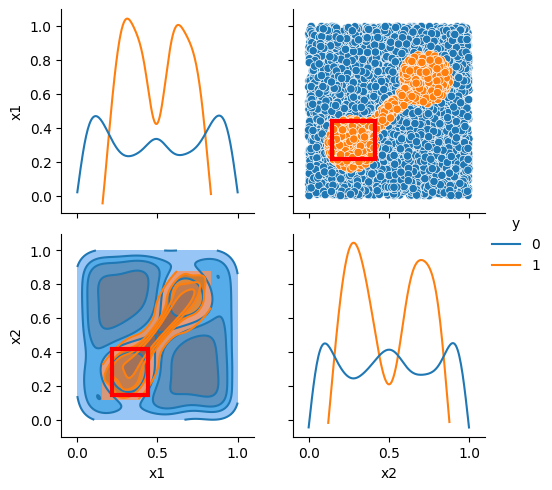

Removing 292 points captured by this box.

--- Iteration 2 ---
Peeling Trajectory (first few rows):
   coverage   density  id    k      mass      mean     n  res_dim
0       1.0  0.114698   0  540  1.000000  0.114698  4708        0
1       1.0  0.120751   1  540  0.949873  0.120751  4472        1
2       1.0  0.127119   2  540  0.902294  0.127119  4248        1
3       1.0  0.133829   3  540  0.857052  0.133829  4035        1
4       1.0  0.140882   4  540  0.814146  0.140882  3833        1

Best Box based on F_metric:
coverage      0.631481
density       0.911765
id           49.000000
k           341.000000
mass          0.079439
mean          0.911765
n           374.000000
res_dim       2.000000
F_metric      0.746171
Name: 49, dtype: float64

Resampled DataFrame:
    reproduce coverage  reproduce density
x1               100.0              100.0
x2               100.0              100.0
Box has been resampled and is deemed SIGNIFICANT (all values > 95).


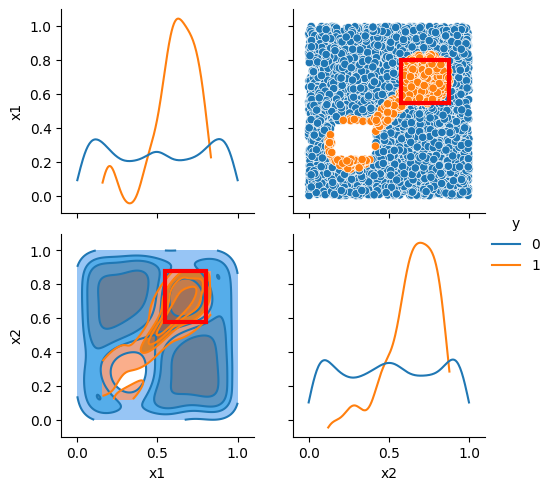

Removing 374 points captured by this box.

--- Iteration 3 ---
Peeling Trajectory (first few rows):
   coverage   density  id    k  mass      mean     n  res_dim
0       1.0  0.045916   0  199   1.0  0.045916  4334        0

Best Box based on F_metric:
coverage       1.000000
density        0.045916
id             0.000000
k            199.000000
mass           1.000000
mean           0.045916
n           4334.000000
res_dim        0.000000
F_metric       0.087801
Name: 0, dtype: float64

Resampled DataFrame:
    reproduce coverage  reproduce density
x1                 0.0               30.0
x2                 0.0                0.0
Box has been resampled and is NOT significant (some values <= 95).


ValueError: No variables found for grid columns.

In [26]:
# Run the iterative process for a desired number of iterations:
iterate_prim_boxes(x_data, y_data, num_iterations=5)

# Classification and Regression Trees (CART)

In [12]:
cart_alg = cart.CART(x_data, y_data, 0.05)
cart_alg.build_tree()

In [13]:
cart_alg.stats_to_dataframe()

,coverage,density,res dim,mass
box 1,0.000000,0.000000,1,0.1250
box 2,0.007264,0.024000,1,0.0500
box 3,0.000000,0.000000,2,0.0788
box 4,0.407990,0.920765,2,0.0732
box 5,0.043584,0.144000,2,0.0500
box 6,0.014528,0.048000,2,0.0500
box 7,0.000000,0.000000,2,0.0746
box 8,0.099274,0.288732,2,0.0568
box 9,0.008475,0.014113,2,0.0992
box 10,0.403148,0.951429,2,0.0700


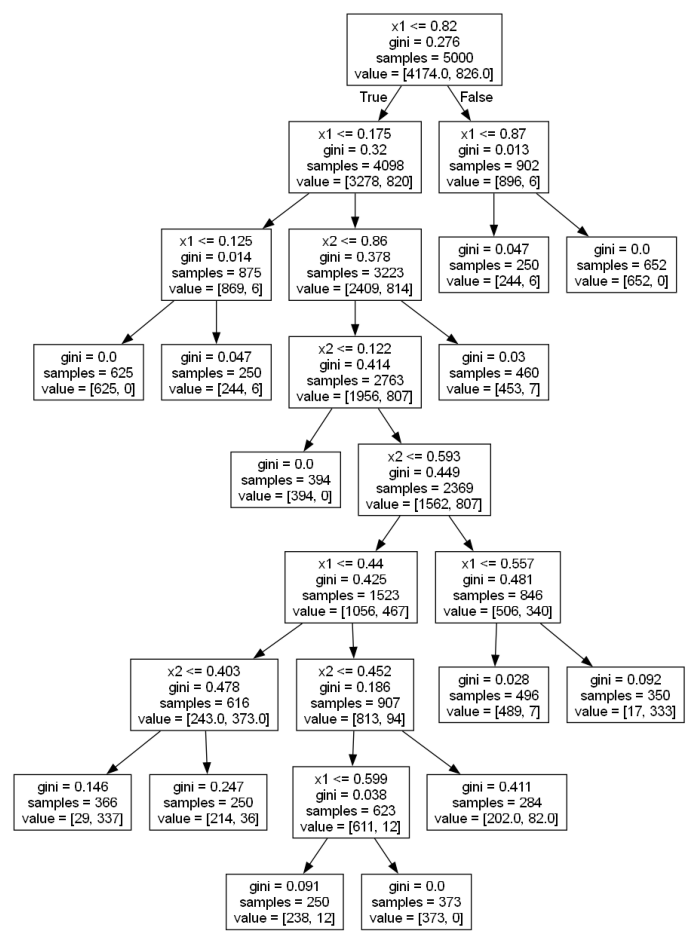

In [15]:
fig = cart_alg.show_tree()
fig.set_size_inches((18, 12))
plt.show()